In [2]:
import requests
import datetime
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
api = "https://api.thegraph.com/subgraphs/name/convex-community/tricrypto"

In [7]:
start_timestamp = 1640995200
end_timestamp = 1642939606
step = 500
time_steps = list(range(start_timestamp, end_timestamp, step))
time_boxes = list(zip(time_steps, time_steps[1:]))
len(time_boxes)

3888

In [8]:
data = []
for time_box in time_boxes:

  query = f"""
  {{
    exchangeEvents(
      where: {{
        timestamp_gte: {time_box[0]}
        timestamp_lt: {time_box[1]}
      }}
    ) {{
      timestamp
      blockNumber
      txHash
      address
      amountUSDSold
      amountETHSold
      amountBTCSold
      amountUSDBought
      amountETHBought
      amountBTCBought
      amountETHSoldUSD
      amountBTCSoldUSD
      amountETHBoughtUSD
      amountBTCBoughtUSD
      assetPrices {{
        btcPrice
        ethPrice
        crv3cryptoUSD
        crv3cryptoBTC
        crv3cryptoETH
      }}
    }}
  }}
  """
  r = requests.post(api, json={'query': query})
  queried_data = dict(r.json())['data']['exchangeEvents']
  data.extend(queried_data)
data

[{'address': '0x4d246be90c2f36730bb853ad41d0a189061192d3',
  'amountBTCBought': '0',
  'amountBTCBoughtUSD': '0',
  'amountBTCSold': '0',
  'amountBTCSoldUSD': '0',
  'amountETHBought': '81.374154338118779973',
  'amountETHBoughtUSD': '299925.2210567518060659302606281269',
  'amountETHSold': '0',
  'amountETHSoldUSD': '0',
  'amountUSDBought': '0',
  'amountUSDSold': '300000',
  'assetPrices': {'btcPrice': '46405.840690666832764788',
   'crv3cryptoBTC': '0.03613607498162953323450130717184412',
   'crv3cryptoETH': '0.4549745709987743810374644647474175',
   'crv3cryptoUSD': '1676.924938783491514667914570169669',
   'ethPrice': '3685.755305186075654899'},
  'blockNumber': '13916182',
  'timestamp': '1640995367',
  'txHash': '0x2c5c6e6b8242317f6f14f1ff5ca2df69f49df5c5477275068de03385fb6d9fb8'},
 {'address': '0x51399b32cd0186bb32230e24167489f3b2f47870',
  'amountBTCBought': '0',
  'amountBTCBoughtUSD': '0',
  'amountBTCSold': '0',
  'amountBTCSoldUSD': '0',
  'amountETHBought': '90.04178401

In [9]:
de_nested_data = {
  'address': [],
  'amountBTCBought': [],
  'amountBTCBoughtUSD': [],
  'amountBTCSold': [],
  'amountBTCSoldUSD': [],
  'amountETHBought': [],
  'amountETHBoughtUSD': [],
  'amountETHSold': [],
  'amountETHSoldUSD': [],
  'amountUSDBought': [],
  'amountUSDSold': [],
  'btcPrice': [],
  'crv3cryptoBTC': [],
  'crv3cryptoETH': [],
  'crv3cryptoUSD': [],
  'ethPrice': [],
  'blockNumber': [],
  'timestamp': [],
  'txHash': [],
}

for i in data:
  de_nested_data['address'].append(i['address'])
  de_nested_data['amountBTCBought'].append(float(i['amountBTCBought']))
  de_nested_data['amountBTCBoughtUSD'].append(float(i['amountBTCBoughtUSD']))
  de_nested_data['amountBTCSold'].append(float(i['amountBTCSold']))
  de_nested_data['amountBTCSoldUSD'].append(float(i['amountBTCSoldUSD']))
  de_nested_data['amountETHBought'].append(float(i['amountETHBought']))
  de_nested_data['amountETHBoughtUSD'].append(float(i['amountETHBoughtUSD']))
  de_nested_data['amountETHSold'].append(float(i['amountETHSold']))
  de_nested_data['amountETHSoldUSD'].append(float(i['amountETHSoldUSD']))
  de_nested_data['amountUSDBought'].append(float(i['amountUSDBought']))
  de_nested_data['amountUSDSold'].append(float(i['amountUSDSold']))
  de_nested_data['btcPrice'].append(float(i['assetPrices']['btcPrice']))
  de_nested_data['crv3cryptoBTC'].append(float(i['assetPrices']['crv3cryptoBTC']))
  de_nested_data['crv3cryptoETH'].append(float(i['assetPrices']['crv3cryptoETH']))
  de_nested_data['crv3cryptoUSD'].append(float(i['assetPrices']['crv3cryptoUSD']))
  de_nested_data['ethPrice'].append(float(i['assetPrices']['ethPrice']))
  de_nested_data['blockNumber'].append(int(i['blockNumber']))
  de_nested_data['timestamp'].append(int(i['timestamp']))
  de_nested_data['txHash'].append(i['txHash'])

de_nested_data

{'address': ['0x4d246be90c2f36730bb853ad41d0a189061192d3',
  '0x51399b32cd0186bb32230e24167489f3b2f47870',
  '0xfa9a30350048b2bf66865ee20363067c66f67e58',
  '0x51399b32cd0186bb32230e24167489f3b2f47870',
  '0x5bd9dee999fe2c4e6efdbab2c395b4685b0c00d0',
  '0x205d52e9ea8e42659ac5c7f83863b18d27d7e0f5',
  '0x51399b32cd0186bb32230e24167489f3b2f47870',
  '0xfb81be4bde317d32ec6934db87e05cfdc5245437',
  '0x205d52e9ea8e42659ac5c7f83863b18d27d7e0f5',
  '0x51399b32cd0186bb32230e24167489f3b2f47870',
  '0x4d246be90c2f36730bb853ad41d0a189061192d3',
  '0x4d246be90c2f36730bb853ad41d0a189061192d3',
  '0x2057cfb9fd11837d61b294d514c5bd03e5e7189a',
  '0x4d246be90c2f36730bb853ad41d0a189061192d3',
  '0x51399b32cd0186bb32230e24167489f3b2f47870',
  '0x51399b32cd0186bb32230e24167489f3b2f47870',
  '0x220bda5c8994804ac96ebe4df184d25e5c2196d4',
  '0xeef86c2e49e11345f1a693675df9a38f7d880c8f',
  '0x2057cfb9fd11837d61b294d514c5bd03e5e7189a',
  '0xbf3f6477dbd514ef85b7d3ec6ac2205fd0962039',
  '0x220bda5c8994804ac96ebe4d

In [10]:
df_tricrypto_swaps = pd.DataFrame(de_nested_data)
df_tricrypto_swaps.sort_values(by="blockNumber", ascending=True, inplace=True)
df_tricrypto_swaps

,address,amountBTCBought,amountBTCBoughtUSD,amountBTCSold,amountBTCSoldUSD,amountETHBought,amountETHBoughtUSD,amountETHSold,amountETHSoldUSD,amountUSDBought,amountUSDSold,btcPrice,crv3cryptoBTC,crv3cryptoETH,crv3cryptoUSD,ethPrice,blockNumber,timestamp,txHash
5,0x205d52e9ea8e42659ac5c7f83863b18d27d7e0f5,0.0,0.0,0.000000,0.000000,74.243850,273682.982457,0.000000,0.000000,0.000000,273486.402694,46422.608023,0.036129,0.454986,1677.203313,3686.271415,13916169,1640995220,0xcf0386389e2ceed713b907e5f97ae417f2a08733bd6c...
2,0xfa9a30350048b2bf66865ee20363067c66f67e58,0.0,0.0,9.477587,439970.919772,0.000000,0.000000,0.000000,0.000000,438120.697287,0.000000,46422.249919,0.036129,0.455003,1677.168311,3686.062908,13916175,1640995291,0x7ecf33e52ab4be7f6c8b007a7cbf3634e854e05e2367...
4,0x5bd9dee999fe2c4e6efdbab2c395b4685b0c00d0,0.0,0.0,0.000000,0.000000,40.739199,150164.869197,0.000000,0.000000,0.000000,150000.000000,46417.570821,0.036131,0.454992,1677.103405,3686.004443,13916177,1640995312,0xc8ec6f23e362f9b79c04d1a0b3f000258d229723beae...
0,0x4d246be90c2f36730bb853ad41d0a189061192d3,0.0,0.0,0.000000,0.000000,81.374154,299925.221057,0.000000,0.000000,0.000000,300000.000000,46405.840691,0.036136,0.454975,1676.924939,3685.755305,13916182,1640995367,0x2c5c6e6b8242317f6f14f1ff5ca2df69f49df5c54772...
1,0x51399b32cd0186bb32230e24167489f3b2f47870,0.0,0.0,0.000000,0.000000,90.041784,331886.185142,0.000000,0.000000,0.000000,332536.500000,46375.149831,0.036153,0.454861,1676.579729,3685.913032,13916196,1640995530,0x62fbe267656ac1c3fe88658d7c47c5400d347d372a36...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,0x220bda5c8994804ac96ebe4df184d25e5c2196d4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,99.900000,251856.903266,250728.126803,0.000000,35788.487218,0.037891,0.537888,1356.063364,2521.090123,14061602,1642937552,0xdeb3a187cb6091dfbc83842ce8930fce65aebe38f241...
7056,0xfa9a30350048b2bf66865ee20363067c66f67e58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,99.900000,251745.437121,250182.743452,0.000000,35792.154641,0.037883,0.538065,1355.910136,2519.974346,14061611,1642937642,0x3aec60362ac8848a739d025b35433f296e77ef481622...
7062,0x51399b32cd0186bb32230e24167489f3b2f47870,0.0,0.0,0.000000,0.000000,0.000000,0.000000,179.956466,452786.870131,449352.737209,0.000000,35800.463723,0.037858,0.538661,1355.319041,2516.091144,14061633,1642937889,0xf35c430776bbabb66a39503cac45105a61bdac10bf02...
7064,0xeef86c2e49e11345f1a693675df9a38f7d880c8f,0.0,0.0,0.000000,0.000000,41.162868,103200.123486,0.000000,0.000000,0.000000,102852.523612,35812.296681,0.037804,0.540005,1353.855106,2507.116950,14061673,1642938439,0x66327014a94041844cd5d7e0c0e06d86b9486816b5fa...


In [11]:
df_tricrypto_swaps['total_volume_usd'] = df_tricrypto_swaps[['amountBTCBoughtUSD', 'amountETHBoughtUSD', 'amountUSDBought', 'amountBTCSoldUSD', 'amountETHSoldUSD', 'amountUSDSold']].sum(axis=1) * 0.5
df_tricrypto_swaps['time'] = pd.to_datetime(df_tricrypto_swaps.timestamp, unit='s')
df_tricrypto_swaps.set_index('time', inplace=True)
df_tricrypto_swaps['total_volume_usd']


time
2022-01-01 00:00:20    273584.692575
2022-01-01 00:01:31    439045.808529
2022-01-01 00:01:52    150082.434598
2022-01-01 00:02:47    299962.610528
2022-01-01 00:05:30    332211.342571
                           ...      
2022-01-23 11:32:32    251292.515035
2022-01-23 11:34:02    250964.090287
2022-01-23 11:38:09    451069.803670
2022-01-23 11:47:19    103026.323549
2022-01-23 11:50:17    125109.638578
Name: total_volume_usd, Length: 7065, dtype: float64

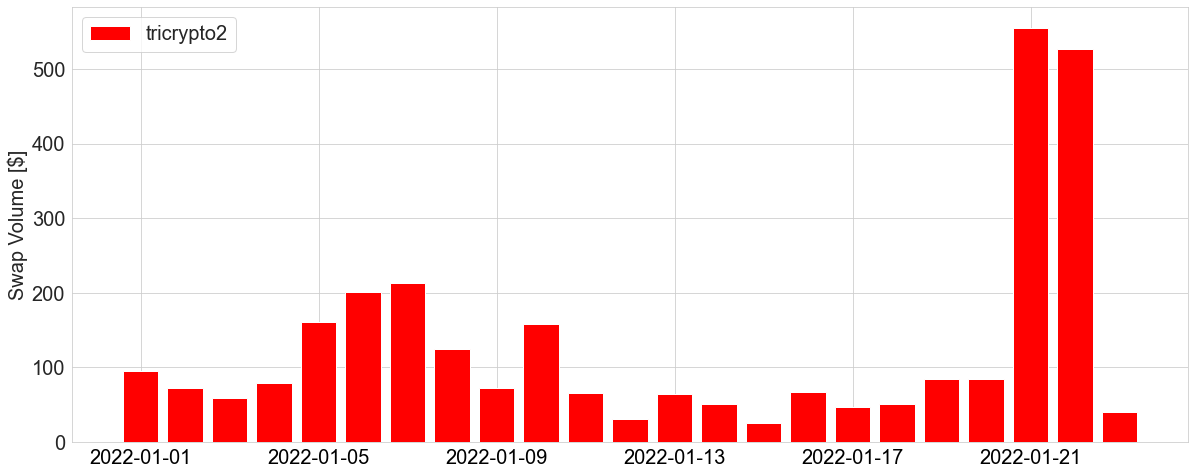

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_tricrypto_swaps_daily_vol = df_tricrypto_swaps.groupby(pd.Grouper(freq='1d')).sum()

ax.bar(
    df_tricrypto_swaps_daily_vol.index,
    df_tricrypto_swaps_daily_vol.total_volume_usd * 1e-6,
    color='red',
    # lw=5,
    label='tricrypto2'
)

# ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Swap Volume [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

In [13]:
query = f"""
{{
  claimAdminFeeEvents(
    where: {{
      timestamp_gt: {start_timestamp}
    }}
  ) {{
    id
    timestamp
    blockNumber
    txHash
    amountClaimed
    claimDollarValue
  }}
}}
"""

r = requests.post(api, json={'query': query})
queried_data = dict(r.json())['data']['claimAdminFeeEvents']
df_claimed_fees = pd.DataFrame(queried_data)
df_claimed_fees

,amountClaimed,blockNumber,claimDollarValue,id,timestamp,txHash
0,56.856262133731280028,14050561,81435.08586499055830609129209241434,0x0211cb7c06452a2c3f0f1d4cb118d73f918831bf64b8...,1642790204,0x0211cb7c06452a2c3f0f1d4cb118d73f918831bf64b8...
1,10.667824165390349405,13987433,16671.96700419607803185614113364013,0x03b1f87d700e3f487d280ab2d443c4074c7673b2ae90...,1641946243,0x03b1f87d700e3f487d280ab2d443c4074c7673b2ae90...
2,24.523715569200400213,13980849,37348.50404632111476054756663675431,0x246ed87cb531b30d7cbc10be0c87ed95ba038cb72f46...,1641859212,0x246ed87cb531b30d7cbc10be0c87ed95ba038cb72f46...
3,9.99476068189710543,13922731,17017.17739504137432147862404833402,0x31bc43f7a627a11421cd3488fbafe60482c29ae2e4b9...,1641082409,0x31bc43f7a627a11421cd3488fbafe60482c29ae2e4b9...
4,11.486099723524433017,13916169,19264.52450861676003526425580989609,0x379e04caaeb523b069bc66e819c7558fda092a30c032...,1640995220,0x379e04caaeb523b069bc66e819c7558fda092a30c032...
5,8.917320614961042133,14026175,13848.7510844098440820496673710202,0x43f366613eb13242db885617ad2b3d8bcd3387da0325...,1642464064,0x43f366613eb13242db885617ad2b3d8bcd3387da0325...
6,11.92282556847536507,14039104,18259.33403614968345443032615647595,0x60074af716b6286e0aa78f20bc2028babd6a6e093c55...,1642636817,0x60074af716b6286e0aa78f20bc2028babd6a6e093c55...
7,3.825366320370418769,14013197,6065.272632944021128572380634148758,0x7ded7b4c6946c7792350fa2d0d027c52d87e15df36ee...,1642291219,0x7ded7b4c6946c7792350fa2d0d027c52d87e15df36ee...
8,13.366922366222723755,14045594,20097.16195590774482645324356673364,0x84ffd60a8533d1c6b480ba4d5398ece04ea3aa5bb379...,1642723216,0x84ffd60a8533d1c6b480ba4d5398ece04ea3aa5bb379...
9,9.60220248670832031,14032637,14870.19889228715063197893515119393,0x94492b5776389b5b8c1ecc0905b5f11ddd5f87a5f55d...,1642550517,0x94492b5776389b5b8c1ecc0905b5f11ddd5f87a5f55d...


In [14]:
df_claimed_fees['time'] = pd.to_datetime(df_claimed_fees.timestamp, unit='s')
df_claimed_fees.set_index('time', inplace=True)
df_claimed_fees['amountClaimed'] = df_claimed_fees.amountClaimed.astype(float)
df_claimed_fees['claimDollarValue'] = df_claimed_fees.claimDollarValue.astype(float)

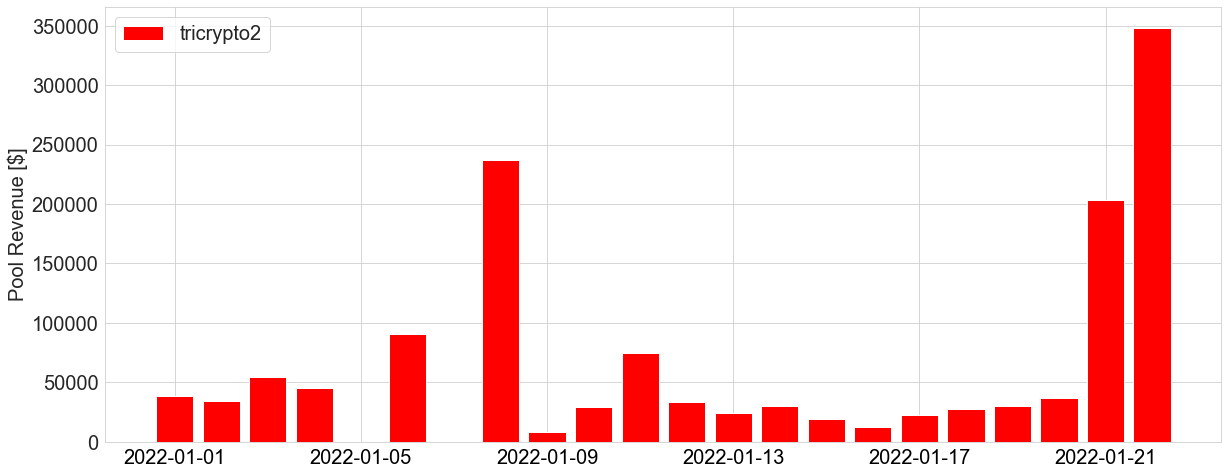

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_claimed_fees_daily = df_claimed_fees.groupby(pd.Grouper(freq='1d')).sum()

ax.bar(
    df_claimed_fees_daily.index,
    df_claimed_fees_daily.claimDollarValue * 2,
    color='red',
    # lw=5,
    label='tricrypto2'
)

ax.set_ylabel("Pool Revenue [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

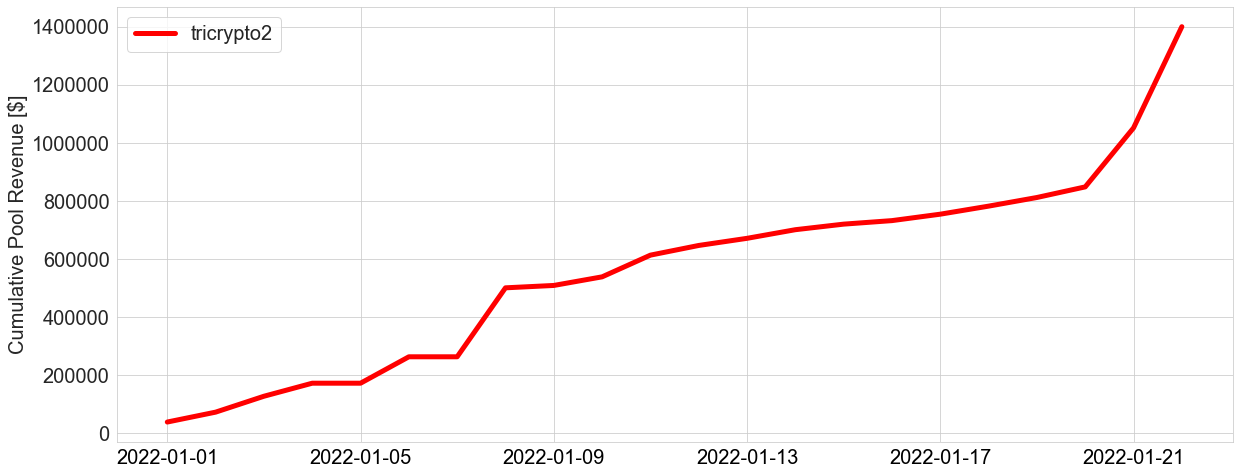

In [16]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_claimed_fees_daily = df_claimed_fees.groupby(pd.Grouper(freq='1d')).sum()

ax.plot(
    df_claimed_fees_daily.index,
    (df_claimed_fees_daily.claimDollarValue * 2).cumsum(),
    color='red',
    lw=5,
    label='tricrypto2'
)

ax.set_ylabel("Cumulative Pool Revenue [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)